data science end of year project part 2
Fasion mnist-2 3.8.21

In [1]:
# all imports that i wuill need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
from sklearn.model_selection import cross_val_score # didnt use
from sklearn.model_selection import cross_val_predict  # didnt use
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score  
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
# importing the data set
training_set=pd.read_csv(r"C:\Users\nechd\Documents\Yehudit docs\אוניברסיטת אריאל\שנה א סמסטר ב\הדמיית נתונים\מטלת גמר\fasion mnist\fashion-mnist_train.csv")
testing_set_dont_touch=pd.read_csv(r"C:\Users\nechd\Documents\Yehudit docs\אוניברסיטת אריאל\שנה א סמסטר ב\הדמיית נתונים\מטלת גמר\fasion mnist\fashion-mnist_test.csv")

In [3]:
training_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# spliting the training set so that i can train and test the models
train_set, test_set = train_test_split(training_set, test_size=0.2, random_state=42)

In [5]:
# changing the the data into a numpy array wuth the data type  being float 32, so tha i cab see the pictures

train_set=np.array(train_set,dtype='float32')
test_set=np.array(test_set,dtype='float32')

# dividing the data intu x,y groups.
# x is all the features
# y is the classification

x_train_set=train_set[:, 1:]
y_train_set=train_set[:, 0]
x_test_set=test_set[:, 1:]
y_test_set=test_set[:, 0]


testing_set_dont_touch=np.array(testing_set_dont_touch,dtype='float32')

x_testing_set_dont_touch=testing_set_dont_touch[:, 1:]
y_testing_set_dont_touch=testing_set_dont_touch[:, 0]

In [6]:
x_train_set

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

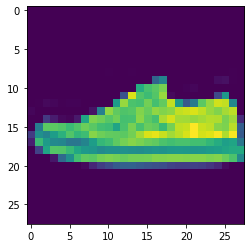

In [7]:
image1=x_train_set[1, :].reshape((28,28))
plt.imshow(image1)

In [8]:
# pca lowers the amount of featues,
# here we are making are data set containe the features that represnt 90% of the varience.

In [9]:
pca=PCA(n_components=0.9)
x_train_reduced=pca.fit_transform(x_train_set)
x_train_recovered=pca.inverse_transform(x_train_reduced)

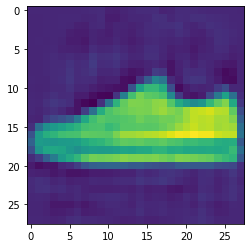

In [10]:
image1=x_train_recovered[1, :].reshape((28,28))
plt.imshow(image1)

In [11]:
# here we are making are data set containe the features that represnt 90% of the varience.
pca1=PCA(n_components=0.9)
x_train_reduced1=pca1.fit_transform(x_train_set)
x_train_recovered1=pca1.inverse_transform(x_train_reduced1)
x_test_reduced1=pca1.transform(x_test_set)
x_test_recovered1=pca1.inverse_transform(x_test_reduced1)

In [12]:
# this data set has 84 features
pca1.n_components_

84

In [13]:
knn1 = KNeighborsClassifier(n_neighbors=27)
knn1.fit(x_train_reduced1, y_train_set)
y_pred_knn1=knn1.predict(x_test_reduced1)
accuracy_knn1=metrics.accuracy_score(y_test_set, y_pred_knn1)
accuracy_knn1

0.85025

In [14]:
mat_knn1=confusion_matrix(y_test_set, y_pred_knn1)
mat_knn1

array([[1056,    1,   13,   38,    6,    0,  109,    0,    9,    0],
       [   8, 1116,    3,   38,    4,    0,    5,    0,    0,    0],
       [   7,    2,  920,   12,  150,    0,  102,    0,    7,    0],
       [  48,    5,    7, 1094,   60,    0,   26,    0,    1,    1],
       [   4,    1,   98,   36,  928,    0,  113,    0,    5,    0],
       [   0,    0,    0,    0,    0,  984,    3,   88,    5,   61],
       [ 256,    0,  147,   22,  115,    0,  684,    0,   18,    1],
       [   0,    0,    0,    0,    0,   13,    0, 1154,    1,   56],
       [   2,    0,   13,    6,    7,    2,   11,    6, 1101,    1],
       [   0,    0,    0,    0,    0,    5,    0,   39,    0, 1166]],
      dtype=int64)

In [15]:
print("precision_score_knn:",precision_score(y_test_set, y_pred_knn1, average='weighted')) 
print("recall_score_knn:",recall_score(y_test_set, y_pred_knn1,average='weighted'))
print("f1_score_knn:",f1_score(y_test_set, y_pred_knn1,average='weighted'))

precision_score_knn: 0.8504580520435633
recall_score_knn: 0.85025
f1_score_knn: 0.8490208813908782


In [16]:
#cross validation
cv_scores_knn1=cross_val_score(knn1, x_train_reduced1, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_knn1, "mean:", np.mean(cv_scores_knn1))

y_pred_knn1_c = cross_val_predict(knn1,  x_train_reduced1, y_train_set, cv=5)
cofussion_knn1=confusion_matrix(y_train_set, y_pred_knn1_c)
cofussion_knn1

# precision call, recalll score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_knn1_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_knn1_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_knn1_c,average='weighted'))

[0.85083333 0.853125   0.8484375  0.845625   0.84364583] mean: 0.8483333333333334


In [75]:
y_pred_knn1_c = cross_val_predict(knn1,  x_train_reduced1, y_train_set, cv=5)
cofussion_knn1=confusion_matrix(y_train_set, y_pred_knn1_c)
cofussion_knn1

array([[4126,    3,   83,  121,   36,    1,  340,    0,   58,    0],
       [  27, 4588,   39,  125,   16,    0,   27,    0,    3,    1],
       [  62,    1, 3605,   36,  594,    0,  475,    1,   25,    1],
       [ 191,   20,   36, 4168,  211,    0,  118,    0,   14,    0],
       [  15,    7,  415,  149, 3732,    0,  475,    0,   22,    0],
       [   2,    0,    0,    4,    0, 4178,    6,  371,   22,  276],
       [ 913,    6,  554,   84,  450,    0, 2684,    0,   66,    0],
       [   0,    0,    0,    0,    0,   38,    0, 4439,    1,  298],
       [  13,    0,   56,   36,   42,   10,   48,   28, 4608,   10],
       [   1,    0,    0,    2,    1,   30,    1,  162,    1, 4592]],
      dtype=int64)

In [77]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_knn1_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_knn1_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_knn1_c,average='weighted'))

precision_score: 0.8492533799725965
recall_score: 0.8483333333333334
f1_score: 0.847574247035811


In [18]:
XG1=XGBClassifier(n_estimators=400, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG1.fit(x_train_reduced1, y_train_set)
y_pred_XG1=XG1.predict(x_test_reduced1)
accuracy_XG1=metrics.accuracy_score(y_test_set, y_pred_XG1)
accuracy_XG1

0.857

In [19]:
mat_XG1=confusion_matrix(y_test_set, y_pred_XG1)
mat_XG1

array([[1038,    2,   10,   55,    4,    3,  107,    0,   13,    0],
       [   3, 1125,    5,   38,    1,    0,    2,    0,    0,    0],
       [   9,    1,  930,   11,  127,    0,  111,    2,    9,    0],
       [  39,    6,    9, 1112,   45,    0,   27,    0,    3,    1],
       [   4,    1,  109,   43,  934,    2,   85,    0,    7,    0],
       [   1,    1,    1,    1,    0, 1060,    0,   51,    5,   21],
       [ 204,    2,  129,   45,  130,    2,  710,    0,   20,    1],
       [   0,    0,    0,    0,    0,   46,    0, 1135,    1,   42],
       [   6,    0,    5,    7,    2,   12,   21,    4, 1090,    2],
       [   1,    0,    0,    0,    0,   19,    0,   38,    2, 1150]],
      dtype=int64)

In [20]:
print("precision_score_XG1:",precision_score(y_test_set, y_pred_XG1, average='weighted')) 
print("recall_score_XG1:",recall_score(y_test_set, y_pred_XG1,average='weighted'))
print("f1_score_XG1:",f1_score(y_test_set, y_pred_XG1,average='weighted'))

precision_score_XG1: 0.8553760887246975
recall_score_XG1: 0.857
f1_score_XG1: 0.85559160519721


In [83]:
#cross validation
cv_scores_XG1=cross_val_score(XG1, x_train_reduced1, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_XG1, "mean:", np.mean(cv_scores_XG1))

[0.86104167 0.85958333 0.85677083 0.85       0.86010417] mean: 0.8575000000000002


In [85]:
y_pred_xg1_c = cross_val_predict(XG1,  x_train_reduced1, y_train_set, cv=5)
cofussion_xg1=confusion_matrix(y_train_set, y_pred_xg1_c)
cofussion_xg1

array([[3998,   19,   69,  207,   19,    9,  386,    0,   61,    0],
       [  12, 4656,   26,  100,   14,    0,    9,    0,    8,    1],
       [  77,    2, 3671,   49,  547,    6,  411,    1,   36,    0],
       [ 151,   33,   48, 4191,  158,    1,  149,    0,   25,    2],
       [  13,    6,  438,  171, 3788,    4,  366,    0,   29,    0],
       [   4,    0,    0,    5,    0, 4528,    3,  214,   21,   84],
       [ 744,    6,  518,  146,  459,    4, 2782,    0,   97,    1],
       [   0,    0,    0,    0,    0,  160,    0, 4398,    5,  213],
       [  16,    2,   31,   30,   24,   37,   93,   28, 4580,   10],
       [   2,    0,    0,    3,    0,   62,    0,  153,    2, 4568]],
      dtype=int64)

In [86]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_xg1_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_xg1_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_xg1_c,average='weighted'))

precision_score: 0.8561314432045871
recall_score: 0.8575
f1_score: 0.8564518874954093


In [101]:
vote1=VotingClassifier(estimators=[('knn1',knn1),('XG1',XG1)], voting='soft', weights=[0.45,0.55])
vote1.fit(x_train_reduced1, y_train_set)
for clf in(knn1, XG1, vote1):
    clf.fit(x_train_reduced1, y_train_set) 
    y_pred_vote1=clf.predict(x_test_reduced1)
    print(clf.__class__ ,accuracy_score(y_test_set,y_pred_vote1))
a_vote1=metrics.accuracy_score(y_test_set, y_pred_vote1)
a_vote1

<class 'sklearn.neighbors._classification.KNeighborsClassifier'> 0.85025
<class 'xgboost.sklearn.XGBClassifier'> 0.857
<class 'sklearn.ensemble._voting.VotingClassifier'> 0.8635833333333334


0.8635833333333334

In [102]:
mat_vote1=confusion_matrix(y_test_set, y_pred_vote1)
mat_vote1

array([[1067,    0,   10,   42,    5,    1,   98,    0,    9,    0],
       [   5, 1123,    5,   37,    2,    0,    2,    0,    0,    0],
       [   8,    1,  939,   11,  129,    0,  100,    0,   12,    0],
       [  40,    3,    5, 1120,   48,    0,   23,    0,    2,    1],
       [   2,    1,   86,   40,  950,    0,   98,    0,    8,    0],
       [   1,    0,    0,    0,    0, 1037,    0,   65,    5,   33],
       [ 236,    2,  135,   30,  113,    0,  709,    0,   17,    1],
       [   0,    0,    0,    0,    0,   26,    0, 1153,    1,   44],
       [   2,    0,    7,    7,    3,    6,   12,    6, 1104,    2],
       [   0,    0,    0,    0,    0,   11,    0,   37,    1, 1161]],
      dtype=int64)

In [103]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(y_test_set, y_pred_vote1,average='weighted')) 
print("recall_score:",recall_score(y_test_set, y_pred_vote1,average='weighted'))
print("f1_score:",f1_score(y_test_set, y_pred_vote1,average='weighted'))

precision_score: 0.8623641572884693
recall_score: 0.8635833333333334
f1_score: 0.862037994215409


In [23]:
# here we are making are data set contane the features that represnt 80% of the varience.

In [24]:
pca2=PCA(n_components=0.8)
x_train_reduced2=pca2.fit_transform(x_train_set)
x_train_recovered2=pca2.inverse_transform(x_train_reduced2)
x_test_reduced2=pca2.transform(x_test_set)
x_test_recovered2=pca2.inverse_transform(x_test_reduced2)

In [25]:
# this data set has 24 features
pca2.n_components_

24

In [26]:
knn2 = KNeighborsClassifier(n_neighbors=27)
knn2.fit(x_train_recovered2, y_train_set)
y_pred_knn2=knn2.predict(x_test_recovered2)
accuracy_knn2=metrics.accuracy_score(y_test_set, y_pred_knn2)
accuracy_knn2

0.8411666666666666

In [27]:
mat_knn2=confusion_matrix(y_test_set, y_pred_knn2)
mat_knn2

array([[1048,    1,   18,   49,    9,    0,   94,    0,   13,    0],
       [   8, 1112,    3,   41,    2,    0,    8,    0,    0,    0],
       [   3,    3,  915,   16,  142,    0,  113,    0,    8,    0],
       [  45,    5,    4, 1099,   63,    0,   24,    0,    2,    0],
       [   6,    2,  108,   44,  909,    0,  109,    0,    7,    0],
       [   1,    0,    0,    0,    0,  982,    0,   99,    4,   55],
       [ 246,    0,  158,   28,  130,    0,  658,    0,   22,    1],
       [   0,    0,    0,    0,    0,   33,    0, 1132,    0,   59],
       [   2,    0,   13,    8,    8,   10,    7,    4, 1095,    2],
       [   0,    0,    0,    0,    0,   14,    0,   51,    1, 1144]],
      dtype=int64)

In [28]:
print("precision_score_knn2:",precision_score(y_test_set, y_pred_knn2, average='weighted')) 
print("recall_score_knn2:",recall_score(y_test_set, y_pred_knn2,average='weighted'))
print("f1_score_knn2:",f1_score(y_test_set, y_pred_knn2,average='weighted'))

precision_score_knn2: 0.8401246188415095
recall_score_knn2: 0.8411666666666666
f1_score_knn2: 0.8393749439193116


In [29]:
#cross validation
cv_scores_knn2=cross_val_score(knn2, x_train_reduced2, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_knn2, "mean:", np.mean(cv_scores_knn2))

[0.84333333 0.843125   0.83875    0.83541667 0.84041667] mean: 0.8402083333333333


In [78]:
y_pred_knn2_c = cross_val_predict(knn2,  x_train_reduced2, y_train_set, cv=5)
cofussion_knn2=confusion_matrix(y_train_set, y_pred_knn2_c)
cofussion_knn2

array([[4056,    9,   94,  177,   34,    1,  333,    0,   63,    1],
       [  27, 4585,   45,  125,   17,    0,   23,    0,    3,    1],
       [  53,    2, 3594,   48,  609,    1,  449,    0,   43,    1],
       [ 194,   38,   41, 4126,  223,    0,  113,    0,   23,    0],
       [  15,    6,  449,  179, 3696,    0,  444,    0,   26,    0],
       [   1,    0,    0,    3,    0, 4230,    4,  375,   21,  225],
       [ 889,    6,  626,  112,  484,    1, 2559,    0,   80,    0],
       [   0,    0,    0,    0,    0,  107,    0, 4345,    3,  321],
       [  14,    0,   42,   46,   37,   27,   48,   30, 4598,    9],
       [   1,    0,    0,    1,    1,   62,    1,  182,    1, 4541]],
      dtype=int64)

In [79]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_knn1_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_knn1_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_knn1_c,average='weighted'))

precision_score: 0.8492533799725965
recall_score: 0.8483333333333334
f1_score: 0.847574247035811


In [31]:
XG2=XGBClassifier(n_estimators=400, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG2.fit(x_train_reduced2, y_train_set)
y_pred_XG2=XG2.predict(x_test_reduced2)
accuracy_XG2=metrics.accuracy_score(y_test_set, y_pred_XG2)
accuracy_XG2

0.8393333333333334

In [32]:
mat_XG2=confusion_matrix(y_test_set, y_pred_XG2)
mat_XG2

array([[1034,    3,   11,   65,    6,    2,   94,    0,   17,    0],
       [   4, 1113,    7,   46,    2,    0,    2,    0,    0,    0],
       [  12,    2,  918,   11,  128,    0,  118,    0,   11,    0],
       [  38,   15,    7, 1093,   51,    0,   35,    0,    3,    0],
       [   4,    3,  107,   55,  915,    0,   92,    0,    9,    0],
       [   1,    0,    0,    0,    0, 1032,    0,   75,    4,   29],
       [ 236,    4,  151,   46,  138,    2,  645,    1,   20,    0],
       [   0,    0,    0,    0,    0,   64,    0, 1098,    1,   61],
       [   9,    0,   10,    6,    0,   14,   19,    4, 1083,    4],
       [   0,    0,    0,    1,    0,   17,    0,   50,    1, 1141]],
      dtype=int64)

In [33]:
print("precision_score_XG2:",precision_score(y_test_set, y_pred_XG2, average='weighted')) 
print("recall_score_XG2:",recall_score(y_test_set, y_pred_XG2,average='weighted'))
print("f1_score_XG2:",f1_score(y_test_set, y_pred_XG2,average='weighted'))

precision_score_XG2: 0.8368861716499038
recall_score_XG2: 0.8393333333333334
f1_score_XG2: 0.8371350934792667


In [87]:
#cross validation
cv_scores_XG2=cross_val_score(XG2, x_train_reduced2, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_XG2, "mean:", np.mean(cv_scores_XG2))

[0.84614583 0.8428125  0.84833333 0.839375   0.83875   ] mean: 0.8430833333333332


In [88]:
y_pred_xg2_c = cross_val_predict(XG2,  x_train_reduced2, y_train_set, cv=5)
cofussion_xg2=confusion_matrix(y_train_set, y_pred_xg2_c)
cofussion_xg2

array([[3941,   21,   92,  249,   17,    8,  371,    0,   68,    1],
       [  20, 4625,   35,  121,    9,    0,    8,    0,    7,    1],
       [  54,    3, 3608,   51,  577,    6,  464,    1,   36,    0],
       [ 175,   52,   39, 4128,  175,    0,  164,    0,   22,    3],
       [  14,   10,  435,  178, 3780,    5,  365,    0,   28,    0],
       [   3,    0,    3,    4,    0, 4418,    2,  278,   25,  126],
       [ 801,    4,  599,  163,  476,    7, 2620,    0,   86,    1],
       [   0,    0,    0,    0,    0,  211,    0, 4285,    9,  271],
       [  14,    3,   40,   30,   19,   41,  107,   22, 4563,   12],
       [   0,    0,    0,    2,    0,   98,    2,  186,    2, 4500]],
      dtype=int64)

In [89]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_xg2_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_xg2_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_xg2_c,average='weighted'))

precision_score: 0.8414408494081917
recall_score: 0.8430833333333333
f1_score: 0.8417827785822511


In [36]:
# here we are making are data set containe the features that represnt 70% of the varience.
pca3=PCA(n_components=0.7)
x_train_reduced3=pca3.fit_transform(x_train_set)
x_train_recovered3=pca3.inverse_transform(x_train_reduced3)
x_test_reduced3=pca3.transform(x_test_set)
x_test_recovered3=pca3.inverse_transform(x_test_reduced3)

In [37]:
# this data set has 9 features
pca3.n_components_

9

In [38]:
knn3 = KNeighborsClassifier(n_neighbors=27)
knn3.fit(x_train_reduced3, y_train_set)
y_pred_knn3=knn3.predict(x_test_reduced3)
accuracy_knn3=metrics.accuracy_score(y_test_set, y_pred_knn3)
accuracy_knn3

0.805

In [39]:
mat_knn3=confusion_matrix(y_test_set, y_pred_knn3)
mat_knn3

array([[ 995,    1,   22,   77,   12,    1,  110,    0,   14,    0],
       [   8, 1092,    8,   56,    6,    0,    4,    0,    0,    0],
       [   5,    1,  825,   14,  179,    0,  163,    0,   13,    0],
       [  46,   12,    3, 1083,   60,    0,   36,    0,    2,    0],
       [   4,    5,  159,   84,  773,    0,  150,    0,   10,    0],
       [   2,    0,    0,    0,    0,  968,    0,  111,    5,   55],
       [ 226,    0,  195,   56,  119,    0,  623,    0,   23,    1],
       [   0,    0,    0,    0,    0,   58,    0, 1089,    0,   77],
       [   3,    0,    8,    7,    4,   12,   17,    5, 1091,    2],
       [   0,    0,    0,    0,    0,   28,    0,   61,    0, 1121]],
      dtype=int64)

In [40]:
print("precision_score_knn3:",precision_score(y_test_set, y_pred_knn3, average='weighted')) 
print("recall_score_knn3:",recall_score(y_test_set, y_pred_knn3,average='weighted'))
print("f1_score_knn3:",f1_score(y_test_set, y_pred_knn3,average='weighted'))

precision_score_knn3: 0.8033518506138512
recall_score_knn3: 0.805
f1_score_knn3: 0.803469354900917


In [80]:
#cross validation
cv_scores_knn3=cross_val_score(knn3, x_train_reduced3, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_knn3, "mean:", np.mean(cv_scores_knn3))

[0.80604167 0.8015625  0.8040625  0.8034375  0.80145833] mean: 0.8033125


In [81]:
y_pred_knn3_c = cross_val_predict(knn3,  x_train_reduced3, y_train_set, cv=5)
cofussion_knn3=confusion_matrix(y_train_set, y_pred_knn3_c)
cofussion_knn3

array([[3850,   16,   93,  319,   48,    1,  379,    0,   62,    0],
       [  34, 4504,   59,  187,   22,    0,   16,    0,    3,    1],
       [  46,    1, 3163,   43,  763,    3,  729,    0,   52,    0],
       [ 206,   52,   40, 4071,  223,    0,  141,    0,   25,    0],
       [  15,    4,  692,  311, 3222,    0,  536,    0,   35,    0],
       [   3,    0,    1,    4,    0, 4118,    2,  416,   27,  288],
       [ 843,    6,  655,  186,  510,    1, 2453,    0,  103,    0],
       [   0,    0,    0,    0,    0,  218,    0, 4205,    7,  346],
       [  15,    0,   66,   50,   32,   49,   63,   29, 4539,    8],
       [   0,    0,    1,    1,    1,  130,    0,  223,    0, 4434]],
      dtype=int64)

In [82]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_knn3_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_knn3_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_knn3_c,average='weighted'))

precision_score: 0.8025371795203896
recall_score: 0.8033125
f1_score: 0.8023436351005391


In [43]:
XG3=XGBClassifier(n_estimators=400, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG3.fit(x_train_recovered3, y_train_set)
y_pred_XG3=XG3.predict(x_test_recovered3)
accuracy_XG3=metrics.accuracy_score(y_test_set, y_pred_XG3)
accuracy_XG3

0.817

In [44]:
mat_XG3=confusion_matrix(y_test_set, y_pred_XG3)
mat_XG3

array([[1005,    3,   18,   58,    6,    3,  127,    0,   12,    0],
       [   6, 1111,    5,   43,    4,    0,    5,    0,    0,    0],
       [   4,    2,  843,   11,  192,    0,  136,    0,   12,    0],
       [  49,   20,    7, 1067,   47,    0,   50,    0,    2,    0],
       [   3,    2,  176,   58,  810,    0,  131,    0,    5,    0],
       [   0,    0,    1,    1,    0, 1036,    1,   65,    4,   33],
       [ 217,    0,  195,   58,  134,    0,  610,    0,   28,    1],
       [   0,    0,    0,    0,    0,   60,    0, 1106,    1,   57],
       [   3,    0,    8,    6,    3,    9,   23,    3, 1094,    0],
       [   0,    0,    1,    0,    0,   33,    0,   54,    0, 1122]],
      dtype=int64)

In [45]:
print("precision_score_XG3:",precision_score(y_test_set, y_pred_XG3, average='weighted')) 
print("recall_score_XG3:",recall_score(y_test_set, y_pred_XG3,average='weighted'))
print("f1_score_XG3:",f1_score(y_test_set, y_pred_XG3,average='weighted'))

precision_score_XG3: 0.8148762732609454
recall_score_XG3: 0.817
f1_score_XG3: 0.8155331560943708


In [90]:
#cross validation
cv_scores_XG3=cross_val_score(XG3, x_train_reduced3, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_XG3, "mean:", np.mean(cv_scores_XG3))

[0.79625    0.79395833 0.798125   0.79208333 0.79270833] mean: 0.7946250000000001


In [91]:
y_pred_xg3_c = cross_val_predict(XG3,  x_train_reduced3, y_train_set, cv=5)
cofussion_xg3=confusion_matrix(y_train_set, y_pred_xg3_c)
cofussion_xg3

array([[3853,   32,   71,  349,   36,    7,  349,    0,   71,    0],
       [  15, 4564,   36,  167,   17,    0,   22,    0,    5,    0],
       [  61,    4, 3058,   39,  878,    8,  689,    0,   63,    0],
       [ 203,   72,   27, 4023,  192,    1,  204,    0,   35,    1],
       [  10,    7,  757,  305, 3238,    2,  454,    0,   42,    0],
       [   0,    0,    0,    8,    0, 4215,    3,  408,   30,  195],
       [ 862,   14,  762,  281,  532,    6, 2185,    0,  115,    0],
       [   0,    0,    0,    0,    0,  293,    0, 4130,   17,  336],
       [  15,    2,   60,   43,   31,   72,  106,   21, 4489,   12],
       [   1,    0,    1,    4,    0,  159,    1,  236,    1, 4387]],
      dtype=int64)

In [92]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_xg3_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_xg3_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_xg3_c,average='weighted'))

precision_score: 0.7916541405196663
recall_score: 0.794625
f1_score: 0.7925031198374151


testing with a different split

In [48]:
train_set1, test_set1 = train_test_split(training_set, test_size=0.2, random_state=9)

train_set1=np.array(train_set,dtype='float32')
test_set1=np.array(test_set,dtype='float32')

x_train_set1=train_set1[:, 1:]
y_train_set1=train_set1[:, 0]
x_test_set1=test_set1[:, 1:]
y_test_set1=test_set1[:, 0]


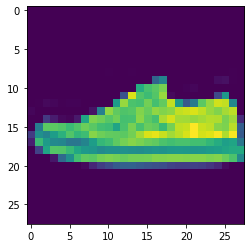

In [49]:
image1=x_train_set1[1, :].reshape((28,28))
plt.imshow(image1)

In [50]:
pca4=PCA(n_components=0.9)
x_train_reduced4=pca4.fit_transform(x_train_set1)
x_train_recovered4=pca4.inverse_transform(x_train_reduced4)
x_test_reduced4=pca4.transform(x_test_set1)
x_test_recovered4=pca4.inverse_transform(x_test_reduced4)

In [51]:
print(pca4.explained_variance_ratio_)
#6*14=84

[0.28984118 0.17740473 0.06014274 0.04988384 0.03857298 0.03455602
 0.02352779 0.01906941 0.01344911 0.01306139 0.0099056  0.00910351
 0.00763417 0.0065899  0.00610854 0.00590688 0.00554202 0.00529724
 0.00463077 0.00455368 0.00431895 0.00407812 0.00383489 0.00376273
 0.00364112 0.00350273 0.00333314 0.00319524 0.00310191 0.00296527
 0.00276032 0.00265654 0.00264357 0.00255114 0.00249119 0.00239356
 0.00230545 0.00223689 0.0022014  0.0021076  0.00201102 0.00196958
 0.00194251 0.0018329  0.00175576 0.0017161  0.00167287 0.00165303
 0.00161782 0.00156227 0.00154179 0.00151261 0.00147693 0.00143162
 0.00138067 0.00137089 0.00131089 0.00129371 0.0012724  0.00126102
 0.00122869 0.00120763 0.00118734 0.00116227 0.00115414 0.00112174
 0.00111105 0.00109231 0.00106667 0.00103951 0.00103836 0.00101901
 0.0009715  0.0009503  0.00093803 0.00093292 0.00093169 0.00091016
 0.00089413 0.00087516 0.00085688 0.00084265 0.00082548 0.00082042]


In [52]:
knn4 = KNeighborsClassifier(n_neighbors=27)
knn4.fit(x_train_reduced4,y_train_set1)
y_pred_knn4=knn4.predict(x_test_reduced4)
accuracy_knn4=metrics.accuracy_score(y_test_set1, y_pred_knn4)
accuracy_knn4

0.85025

In [53]:
mat_knn4=confusion_matrix(y_test_set1, y_pred_knn4)
mat_knn4

array([[1056,    1,   13,   38,    6,    0,  109,    0,    9,    0],
       [   8, 1116,    3,   38,    4,    0,    5,    0,    0,    0],
       [   7,    2,  920,   12,  150,    0,  102,    0,    7,    0],
       [  48,    5,    7, 1094,   60,    0,   26,    0,    1,    1],
       [   4,    1,   98,   36,  928,    0,  113,    0,    5,    0],
       [   0,    0,    0,    0,    0,  984,    3,   88,    5,   61],
       [ 256,    0,  147,   22,  115,    0,  684,    0,   18,    1],
       [   0,    0,    0,    0,    0,   13,    0, 1154,    1,   56],
       [   2,    0,   13,    6,    7,    2,   11,    6, 1101,    1],
       [   0,    0,    0,    0,    0,    5,    0,   39,    0, 1166]],
      dtype=int64)

In [54]:
print("precision_score_knn4:",precision_score(y_test_set1, y_pred_knn4, average='weighted')) 
print("recall_score_knn4:",recall_score(y_test_set1, y_pred_knn4,average='weighted'))
print("f1_score_knn4:",f1_score(y_test_set1, y_pred_knn4,average='weighted'))

precision_score_knn4: 0.8504580520435633
recall_score_knn4: 0.85025
f1_score_knn4: 0.8490208813908782


In [55]:
XG4=XGBClassifier(n_estimators=400, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG4.fit(x_train_reduced4, y_train_set1)
y_pred_XG4=XG4.predict(x_test_reduced4)
accuracy_XG4=metrics.accuracy_score(y_test_set1, y_pred_XG4)
accuracy_XG4

0.857

In [56]:
mat_XG4=confusion_matrix(y_test_set1, y_pred_XG4)
mat_XG4

array([[1038,    2,   10,   55,    4,    3,  107,    0,   13,    0],
       [   3, 1125,    5,   38,    1,    0,    2,    0,    0,    0],
       [   9,    1,  930,   11,  127,    0,  111,    2,    9,    0],
       [  39,    6,    9, 1112,   45,    0,   27,    0,    3,    1],
       [   4,    1,  109,   43,  934,    2,   85,    0,    7,    0],
       [   1,    1,    1,    1,    0, 1060,    0,   51,    5,   21],
       [ 204,    2,  129,   45,  130,    2,  710,    0,   20,    1],
       [   0,    0,    0,    0,    0,   46,    0, 1135,    1,   42],
       [   6,    0,    5,    7,    2,   12,   21,    4, 1090,    2],
       [   1,    0,    0,    0,    0,   19,    0,   38,    2, 1150]],
      dtype=int64)

In [57]:
print("precision_score_XG4:",precision_score(y_test_set1, y_pred_XG4, average='weighted')) 
print("recall_score_XG4:",recall_score(y_test_set1, y_pred_XG4,average='weighted'))
print("f1_score_XG4:",f1_score(y_test_set1, y_pred_XG4,average='weighted'))

precision_score_XG4: 0.8553760887246975
recall_score_XG4: 0.857
f1_score_XG4: 0.85559160519721


In [58]:
pca5=PCA(n_components=0.8)
x_train_reduced5=pca5.fit_transform(x_train_set1)
x_train_recovered5=pca5.inverse_transform(x_train_reduced5)
x_test_reduced5=pca5.fit_transform(x_test_set1)
x_test_recovered5=pca2.inverse_transform(x_test_reduced5)

In [59]:
print(pca5.explained_variance_ratio_)
#6*4=24

[0.2913279  0.17671171 0.06060459 0.04901269 0.03766733 0.03534918
 0.02313465 0.01944976 0.0134384  0.01329758 0.00992759 0.00924182
 0.00775141 0.00667874 0.00605891 0.00596349 0.00548039 0.00534439
 0.00458174 0.00449609 0.00437624 0.00399073 0.00386107 0.00368459]


In [60]:
knn5 = KNeighborsClassifier(n_neighbors=27)
knn5.fit(x_train_recovered5, y_train_set1)
y_pred_knn5=knn5.predict(x_test_recovered5)
accuracy_knn5=metrics.accuracy_score(y_test_set1, y_pred_knn5)
accuracy_knn5

0.6043333333333333

In [61]:
mat_knn5=confusion_matrix(y_test_set1, y_pred_knn5)
mat_knn5

array([[ 936,    9,   11,  138,   19,    8,   99,    0,   12,    0],
       [  10, 1103,    1,   35,    9,    0,    7,    0,    2,    7],
       [  21,    5,  486,   59,  218,   62,   63,    0,   44,  242],
       [  55,   28,    1, 1048,   60,    0,   46,    0,    4,    0],
       [   8,    3,   65,  109,  773,   26,   48,    0,   20,  133],
       [   0,    0,   16,    1,    3,  476,   19,  595,   18,   13],
       [ 266,    3,   93,  128,  235,   83,  265,    3,   52,  115],
       [   0,    0,    5,    0,    3,  116,    0, 1091,    9,    0],
       [   5,    0,    2,   15,    6,   19,    7,   30, 1064,    1],
       [   0,    0,  292,    0,  175,  406,  188,   51,   88,   10]],
      dtype=int64)

In [62]:
print("precision_score_knn5:",precision_score(y_test_set1, y_pred_knn5, average='weighted')) 
print("recall_score_knn5:",recall_score(y_test_set1, y_pred_knn5,average='weighted'))
print("f1_score_knn5:",f1_score(y_test_set1, y_pred_knn5,average='weighted'))

precision_score_knn5: 0.5564621497259947
recall_score_knn5: 0.6043333333333333
f1_score_knn5: 0.5731181533983735


In [63]:
XG5=XGBClassifier(n_estimators=400, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG5.fit(x_train_recovered5, y_train_set1)
y_pred_XG5=XG5.predict(x_test_recovered5)
accuracy_XG5=metrics.accuracy_score(y_test_set1, y_pred_XG5)
accuracy_XG5

0.5678333333333333

In [64]:
mat_XG5=confusion_matrix(y_test_set1, y_pred_XG5)
mat_XG5

array([[ 882,    1,   70,  134,    5,   29,   97,    1,   11,    2],
       [  23, 1055,   18,   64,    2,    2,    6,    0,    1,    3],
       [  51,    1,  568,   43,   39,  133,  171,    1,   28,  165],
       [  43,   11,   89, 1016,   37,    6,   33,    1,    6,    0],
       [  15,    1,  204,   99,  371,   77,  340,    0,   23,   55],
       [   1,    0,    7,    7,   11,  549,   35,  486,   13,   32],
       [ 259,    3,  109,  115,   59,  110,  439,    6,   40,  103],
       [   0,    0,    2,    1,    1,  315,    8,  875,   22,    0],
       [   4,    0,    5,   17,    1,   15,   31,   17, 1055,    4],
       [   0,    0,  119,    2,   37,  601,  347,    9,   91,    4]],
      dtype=int64)

In [65]:
print("precision_score_XG5:",precision_score(y_test_set1, y_pred_XG5, average='weighted')) 
print("recall_score_XG5:",recall_score(y_test_set1, y_pred_XG5,average='weighted'))
print("f1_score_XG5:",f1_score(y_test_set1, y_pred_XG5,average='weighted'))

precision_score_XG5: 0.5520249406963974
recall_score_XG5: 0.5678333333333333
f1_score_XG5: 0.5498519626021436


In [66]:
pca6=PCA(n_components=0.7)
x_train_reduced6=pca6.fit_transform(x_train_set1)
x_train_recovered6=pca6.inverse_transform(x_train_reduced6)
x_test_reduced6=pca6.transform(x_test_set1)
x_test_recovered6=pca6.inverse_transform(x_test_reduced6)

In [67]:
print(pca6.explained_variance_ratio_)
#9

[0.28984118 0.17740473 0.06014274 0.04988384 0.03857298 0.03455602
 0.02352779 0.01906941 0.01344911]


In [68]:
knn6 = KNeighborsClassifier(n_neighbors=27)
knn6.fit(x_train_recovered6, y_train_set1)
y_pred_knn6=knn6.predict(x_test_recovered6)
accuracy_knn6=metrics.accuracy_score(y_test_set1, y_pred_knn6)
accuracy_knn6

0.805

In [69]:
mat_knn6=confusion_matrix(y_test_set1, y_pred_knn6)
mat_knn6

array([[ 995,    1,   22,   77,   12,    1,  110,    0,   14,    0],
       [   8, 1092,    8,   56,    6,    0,    4,    0,    0,    0],
       [   5,    1,  825,   14,  179,    0,  163,    0,   13,    0],
       [  46,   12,    3, 1083,   60,    0,   36,    0,    2,    0],
       [   4,    5,  159,   84,  773,    0,  150,    0,   10,    0],
       [   2,    0,    0,    0,    0,  968,    0,  111,    5,   55],
       [ 226,    0,  195,   56,  119,    0,  623,    0,   23,    1],
       [   0,    0,    0,    0,    0,   58,    0, 1089,    0,   77],
       [   3,    0,    8,    7,    4,   12,   17,    5, 1091,    2],
       [   0,    0,    0,    0,    0,   28,    0,   61,    0, 1121]],
      dtype=int64)

In [70]:
print("precision_score_knn6:",precision_score(y_test_set1, y_pred_knn6, average='weighted')) 
print("recall_score_knn6:",recall_score(y_test_set1, y_pred_knn6,average='weighted'))
print("f1_score_knn6:",f1_score(y_test_set1, y_pred_knn6,average='weighted'))

precision_score_knn6: 0.8033518506138512
recall_score_knn6: 0.805
f1_score_knn6: 0.803469354900917


In [71]:
XG6=XGBClassifier(n_estimators=400, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG6.fit(x_train_recovered6, y_train_set1)
y_pred_XG6=XG3.predict(x_test_recovered6)
accuracy_XG6=metrics.accuracy_score(y_test_set1, y_pred_XG6)
accuracy_XG6

0.817

In [72]:
mat_XG6=confusion_matrix(y_test_set1, y_pred_XG6)
mat_XG6

array([[1005,    3,   18,   58,    6,    3,  127,    0,   12,    0],
       [   6, 1111,    5,   43,    4,    0,    5,    0,    0,    0],
       [   4,    2,  843,   11,  192,    0,  136,    0,   12,    0],
       [  49,   20,    7, 1067,   47,    0,   50,    0,    2,    0],
       [   3,    2,  176,   58,  810,    0,  131,    0,    5,    0],
       [   0,    0,    1,    1,    0, 1036,    1,   65,    4,   33],
       [ 217,    0,  195,   58,  134,    0,  610,    0,   28,    1],
       [   0,    0,    0,    0,    0,   60,    0, 1106,    1,   57],
       [   3,    0,    8,    6,    3,    9,   23,    3, 1094,    0],
       [   0,    0,    1,    0,    0,   33,    0,   54,    0, 1122]],
      dtype=int64)

In [73]:
print("precision_score_XG6:",precision_score(y_test_set1, y_pred_XG6, average='weighted')) 
print("recall_score_XG6:",recall_score(y_test_set1, y_pred_XG6,average='weighted'))
print("f1_score_XG6:",f1_score(y_test_set1, y_pred_XG6,average='weighted'))

precision_score_XG6: 0.8148762732609454
recall_score_XG6: 0.817
f1_score_XG6: 0.8155331560943708
